# KNN Algorithm

K-Nearest Neighbours is one of the most __basic yet essential classification algorithms__ in Machine Learning. It belongs to the __supervised learning__ domain and finds intense application in __pattern recognition__, __data mining__ and __intrusion detection__.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it __does not make__ any __underlying assumptions__ about the distribution of data.

- __Supervised learning__, in the context machine learning, is a type of system in which both __input__ and __desired output__ data are provided. Input and output data are __labelled for classification__ to provide a learning basis for future data processing.
<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/download.png"/>


### KNN for Regression
When KNN is used for regression problems the _prediction is based on the __mean or the median__ of the K-most similar instances_.<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/download%20(2).png" />


### KNN for Classification
When KNN is used for classification, the output can be calculated as the __class with the highest frequency__ from the __K-most similar instances__. Each instance in essence __votes for their class and the class with the most votes is taken as the prediction__.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance. For example, in a binary classification problem (class is 0 or 1):

p(class=0) = count(class=0) / (count(class=0)+count(class=1))

If you are using K and you have an even number of classes (e.g. 2) it is a good idea to choose a K value with an odd number to avoid a tie. And the inverse, use an even number for K when you have an odd number of classes.
<img src="https://raw.githubusercontent.com/insaid2018/Term-3/master/Images/download%20(3).png" />

## Problem Statement
Data set  has 9 properties, the first one is optical property, the rest 8 is chemical oxide contents of glass, so property 1 and property 2-9 has different dimension.<br>
unit measurement for contents: weight percent in corresponding oxide, as are attributes
glass class has 7 types, but type 4 is not in this data set.<br>

----------
The study of classification of types of glass was motivated by __criminological investigation__. At the scene of the crime, the glass left can be used as __evidence__...if it is correctly identified!

---

Names:<br>
1. building_windows_float_processed 
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps


----------
__Main ingredient of glass: SiO2, other contents are also oxides, such as: Na2O, CaO,K2O__

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data loading

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/amity1415/eKeeda/main/Rawdata/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape

(214, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
# data['Type'].value_counts()
a=data['Type'].groupby(data['Type']).count()
a

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type'>

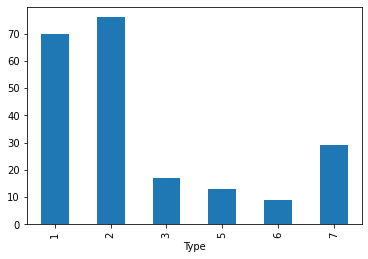

In [12]:
a.plot(kind='bar')

<AxesSubplot:xlabel='RI', ylabel='Na'>

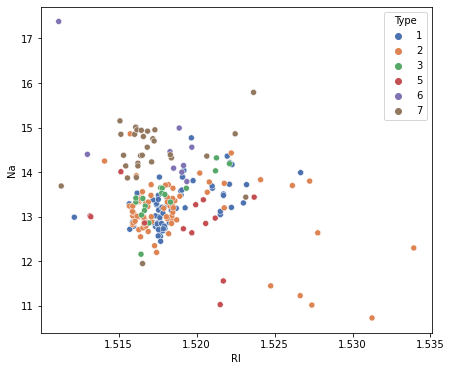

In [31]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='RI',y="Na",hue='Type',data=data,palette='deep')

<AxesSubplot:>

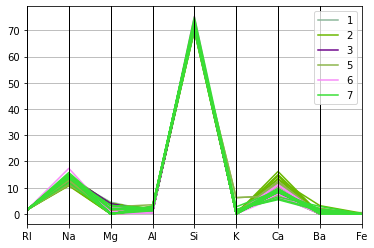

In [35]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data,'Type')

In [36]:
#Getting skewness of data
data.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

### Standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler
a=data.pop('Type')
ss=StandardScaler()
ss.fit(data)
scaled_data=ss.transform(data)
print(pd.DataFrame(scaled_data,columns=data.columns).head())


         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


In [42]:
pd.DataFrame(scaled_data).skew()

0    1.625431
1    0.454181
2   -1.152559
3    0.907290
4   -0.730447
5    6.551648
6    2.047054
7    3.416425
8    1.754327
dtype: float64

## Splitting the data

In [90]:
from sklearn.model_selection import train_test_split
data_train,data_test,a_train,a_test=train_test_split(scaled_data,a,test_size=0.3,random_state=1)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(data_train,a_train)

KNeighborsClassifier()

In [92]:
y_pred=knn.predict(data_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(a_test,y_pred)


0.7384615384615385

In [94]:
confusion_matrix(a_test,y_pred)

array([[20,  4,  1,  0,  0,  0],
       [ 2, 17,  0,  0,  2,  0],
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  8]], dtype=int64)

In [95]:
print(classification_report(a_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.80      0.77        25
           2       0.71      0.81      0.76        21
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.63      0.75      0.66        65
weighted avg       0.69      0.74      0.71        65



## Error rate to find k-value

In [96]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(data_train,a_train)
 pred_i = knn.predict(data_test)
 error_rate.append(np.mean(pred_i != a_test))





Text(0, 0.5, 'Error rate')

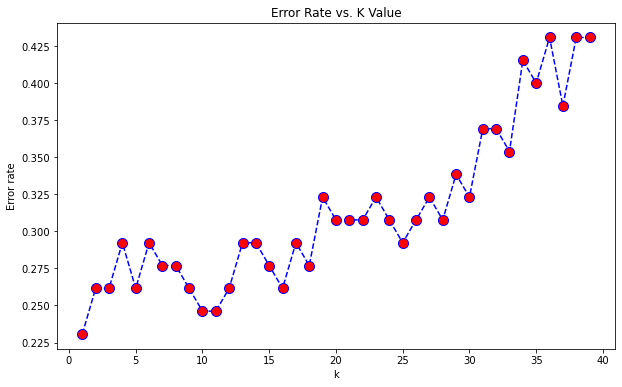

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')
plt.ylabel('Error rate')

#### The optimal number of k-values is : 10

In [98]:
knn=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
knn.fit(data_train,a_train)
y_pred=knn.predict(data_test)
accuracy_score(a_test,y_pred)

0.7538461538461538

#### The accuracy score increased from 73 to 75